# Data Exploration

This notebook explores the distortion and framing dataset structure and characteristics.

In [27]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

from src.data.dataset_generator import DatasetGenerator

## Load SPICED Dataset

In [29]:
# Load the SPICED dataset
spiced_ds = load_dataset("copenlu/spiced")
print(f"Dataset splits: {list(spiced_ds.keys())}")
print(f"Train size: {len(spiced_ds['train'])}")
print(f"Validation size: {len(spiced_ds['validation'])}")
print(f"Test size: {len(spiced_ds['test'])}")

Dataset splits: ['train', 'validation', 'test']
Train size: 4721
Validation size: 664
Test size: 640


## Explore Dataset Structure

In [30]:
# Examine the structure of the dataset
sample = spiced_ds['train'][0]
print("Dataset features:")
for key, value in sample.items():
    print(f"{key}: {type(value)} - {str(value)[:100]}...")

Dataset features:
DOI: <class 'str'> - 10.1016/j.robot.2015.01.003...
instance_id: <class 'str'> - Computer_Science_0...
News Finding: <class 'str'> - Terekhov and his colleagues showed that the notion of space as environment-independent cannot be ded...
Paper Finding: <class 'str'> - We show that the notion of space as environmentindependent cannot be deduced solely from exterocepti...
News Context: <class 'str'> - If we want robots to be truly intelligent, we should not build them using abstract notions, but inst...
Paper Context: <class 'str'> - One of the most fundamental perceptual notions, space, cannot be an exception to this requirement. W...
scores: <class 'str'> - [4.0, 3.0, 3.0, 5.0]...
field: <class 'str'> - Computer_Science...
split: <class 'str'> - train...
final_score: <class 'float'> - 3.75...
source: <class 'str'> - news...
News URL: <class 'str'> - http://ct.moreover.com/?a=37406801001&p=1pl&v=1&x=ssZ2MTLzJwq_5rjL57WYwg...


## Analyze Label Distributions

In [32]:
# Load label files to understand distributions
causality_labels = pd.read_csv('../data/aggregated-labels/causality/causality.tsv', sep='\t')
certainty_labels = pd.read_csv('../data/aggregated-labels/certainty/certainty.tsv', sep='\t')
generality_labels = pd.read_csv('../data/aggregated-labels/generalization/general.tsv', sep='\t')
sensationalism_labels = pd.read_csv('../data/aggregated-labels/sensationalism/sensationalism_all_labels.csv')

print("Causality label distribution:")
print(causality_labels.columns)
print("\nCertainty label distribution:")
print(certainty_labels.columns)
print("\nGenerality label distribution:")
print(generality_labels.columns)

Causality label distribution:
Index(['id', 'label_paper_finding', 'label_reported_finding'], dtype='object')

Certainty label distribution:
Index(['id', 'label_paper_finding', 'label_reported_finding'], dtype='object')

Generality label distribution:
Index(['id', 'agg_label', 'which-finding-is-more-general'], dtype='object')


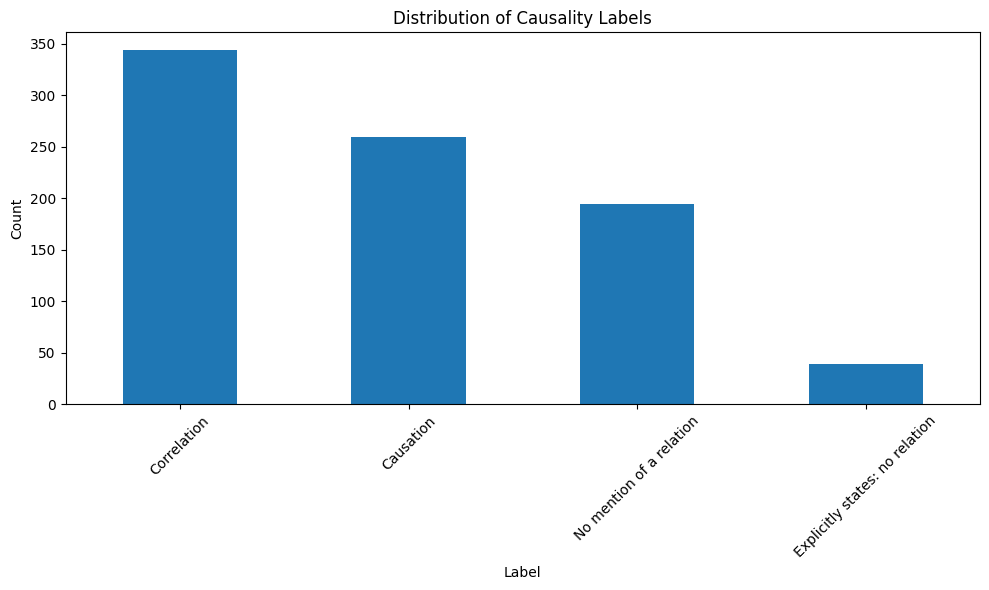

label_paper_finding
Correlation                       344
Causation                         260
No mention of a relation          194
Explicitly states: no relation     39
Name: count, dtype: int64


In [33]:
# Count the occurrences of each label
label_counts = causality_labels['label_paper_finding'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Causality Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the counts
print(label_counts)

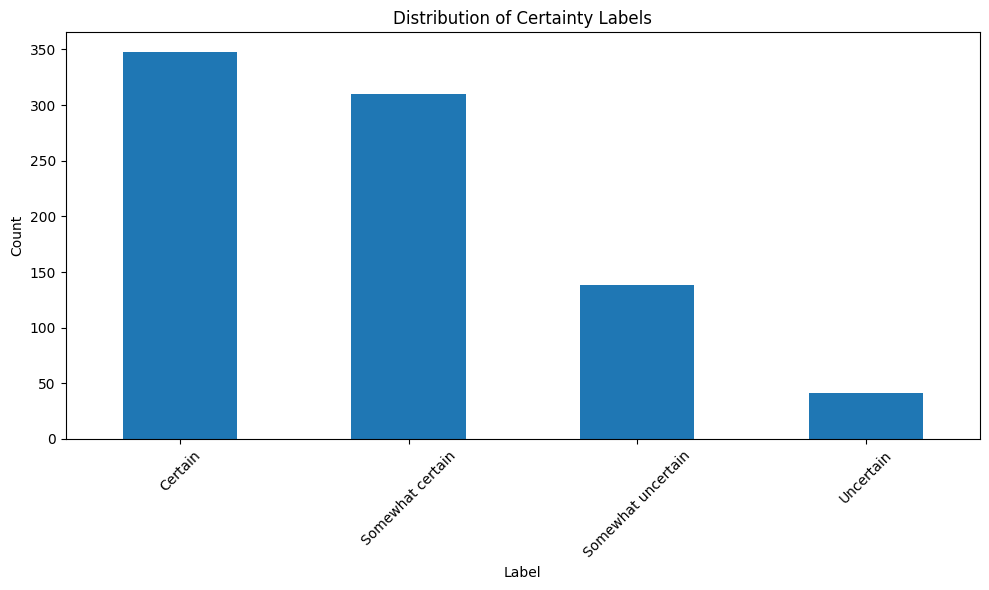

label_paper_finding
Certain               348
Somewhat certain      310
Somewhat uncertain    138
Uncertain              41
Name: count, dtype: int64


In [35]:
# Count the occurrences of each label
label_counts = certainty_labels['label_paper_finding'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Certainty Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the counts
print(label_counts)

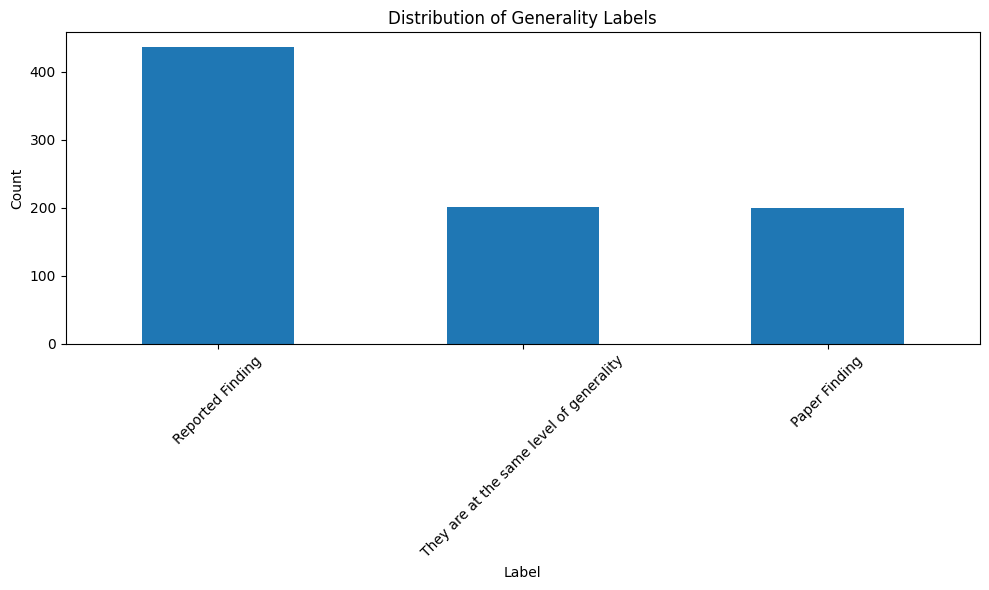

which-finding-is-more-general
Reported Finding                            436
They are at the same level of generality    201
Paper Finding                               200
Name: count, dtype: int64


In [37]:
# Count the occurrences of each label
label_counts = generality_labels['which-finding-is-more-general'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Generality Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the counts
print(label_counts)